In [991]:
import pandas as pd 
import json
import numpy as np
from bertopic import BERTopic


In [992]:
with open("/home/cm2435/Desktop/xapien_task/data/NiramaxTextData.json", "r") as f: 
    file = json.load(f)

In [1048]:
df = pd.DataFrame(file['SearchResults'])
df.columns = df.columns.str.lower()


In [1049]:
df['full_text'] = df.title + df.snippet
df = df.drop_duplicates(subset= "full_text")


In [1052]:
probs

array([0.9381593 , 0.63142201, 0.        , 0.99175986, 0.96174904,
       1.        , 0.87641671, 1.        , 0.        , 1.        ,
       1.        , 0.77106259, 1.        , 0.        , 0.97340869,
       0.        , 0.52893667, 1.        , 0.        , 0.62790854,
       0.68707484, 0.71187032, 0.98776912, 0.        , 0.        ,
       0.83692823, 1.        , 0.61173515, 0.        , 0.83782577,
       0.85824913, 0.56096065, 0.83898841, 0.99142858, 1.        ,
       1.        , 1.        , 0.        , 0.89055296, 1.        ,
       0.93345748, 1.        , 1.        , 0.85549716, 0.        ,
       0.95941971, 0.82278986, 0.81438831, 0.93963245, 1.        ,
       0.        , 1.        , 1.        , 0.89833759, 0.63142201,
       1.        , 0.        , 1.        , 0.9724953 , 0.        ,
       0.93612604, 1.        , 1.        , 0.        , 0.81905493,
       0.        , 0.81396607, 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.97095736, 1.        , 0.86114

In [1051]:
from bertopic import BERTopic
import openai
from bertopic.representation import OpenAI

unique_titles = df.title.drop_duplicates().values 
representation_model = OpenAI(model="gpt-3.5-turbo", chat=True)

topic_model = BERTopic(embedding_model = SentenceTransformer('all-MiniLM-L6-v2'))
topics, probs = topic_model.fit_transform(unique_titles)

topic_model.get_topic_info()


2023-06-18 17:28:03,620 - BERTopic - Transformed documents to Embeddings
2023-06-18 17:28:05,112 - BERTopic - Reduced dimensionality
2023-06-18 17:28:05,117 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name,Representation,Representative_Docs
0,-1,19,-1_elliott_neil_boss_niramax,"[elliott, neil, boss, niramax, teesside, news,...","[Killer Neil Elliott's role at Niramax, the wa..."
1,0,34,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...
2,1,20,1_murder_hartlepool_jailed_of,"[murder, hartlepool, jailed, of, in, death, ph...",[Businessman jailed over death of drug addict ...
3,2,15,2_waste_fraud_tax_and,"[waste, fraud, tax, and, landfill, firm, indus...",[Waste Industry: Criminality and Regulation - ...


In [1053]:
topic_df = topic_model.get_document_info(unique_titles)


In [1056]:
topic_df

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...,niramax - limited - find - and - group - updat...,0.938159,False
1,Non-disclosure to insurers (pre-Insurance Act ...,0,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...,niramax - limited - find - and - group - updat...,0.631422,False
2,Recycling firm Niramax fined Â£16000 over envi...,-1,-1_elliott_neil_boss_niramax,"[elliott, neil, boss, niramax, teesside, news,...","[Killer Neil Elliott's role at Niramax, the wa...",elliott - neil - boss - niramax - teesside - n...,0.000000,False
3,Contact us - Niramax Group Limited,0,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...,niramax - limited - find - and - group - updat...,0.991760,False
4,NIRAMAX ENERGY LIMITED overview - Find and upd...,0,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...,niramax - limited - find - and - group - updat...,0.961749,False
...,...,...,...,...,...,...,...,...
83,NIRAMAX HOLDINGS LIMITED more information - Fi...,0,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...,niramax - limited - find - and - group - updat...,1.000000,True
84,NIRAMAX GROUP LIMITED filing history - Find an...,0,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...,niramax - limited - find - and - group - updat...,0.976012,False
85,NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,0,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...,niramax - limited - find - and - group - updat...,0.538860,False
86,NIRAMAX RUBBER PRODUCTS LIMITED more informati...,0,0_niramax_limited_find_and,"[niramax, limited, find, and, group, update, c...",[NIRAMAX HOLDINGS LIMITED more information - F...,niramax - limited - find - and - group - updat...,0.627738,False


In [997]:
topic_df = topic_model.get_document_info(unique_titles)
topic_df.columns = topic_df.columns.str.lower()


In [998]:
#Merge 
merged_df = pd.merge(df, topic_df, left_on=['title'], right_on=['document'], how='inner')

# Drop the redundant 'Document' column from the merged DataFrame
merged_df = merged_df.drop('document', axis=1)


In [999]:
merged_df

,title,snippet,date,sourceids,full_text,topic,name,representation,representative_docs,top_n_words,probability,representative_document
0,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.825963,False
1,Zurich Insurance PLC v Niramax Group Limited [...,"4 May 2021 - The Respondent, Niramax, was in t...","{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[4eb3a73b-1feb-4c84-a5fc-0a15d9df8410, e4c060e...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.825963,False
2,Non-disclosure to insurers (pre-Insurance Act ...,"29 Jul 2021 - In December 2015, waste collecti...","{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...","[1afc8049-8272-425f-aea1-23d0dda39eb3, c43a9f9...",Non-disclosure to insurers (pre-Insurance Act ...,-1,-1_niramax_products_rubber_elliott,"[niramax, products, rubber, elliott, neil, bos...","[Killer Neil Elliott's role at Niramax, the wa...",niramax - products - rubber - elliott - neil -...,0.000000,False
3,Recycling firm Niramax fined Â£16000 over envi...,15 Jan 2018 - Niramax Group Ltd pleaded guilty...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[be8451e5-537a-4088-8763-2dfbd7a77ad5, 5e7bf3c...",Recycling firm Niramax fined Â£16000 over envi...,-1,-1_niramax_products_rubber_elliott,"[niramax, products, rubber, elliott, neil, bos...","[Killer Neil Elliott's role at Niramax, the wa...",niramax - products - rubber - elliott - neil -...,0.000000,False
4,Contact us - Niramax Group Limited,Niramax Group Limited John Shadforth House Tho...,None,"[11c72183-4331-44e5-ad37-5d93ee6c67ea, 9d1c254...",Contact us - Niramax Group LimitedNiramax Grou...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
90,NIRAMAX HOLDINGS LIMITED more information - Fi...,NIRAMAX HOLDINGS LIMITED - Free company inform...,None,[7e3564a2-260d-495a-ad56-d02d20e37e2a],NIRAMAX HOLDINGS LIMITED more information - Fi...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
91,NIRAMAX GROUP LIMITED filing history - Find an...,NIRAMAX GROUP LIMITED - Free company informati...,None,[6faef2d8-caba-4679-850e-8dcccec6be2e],NIRAMAX GROUP LIMITED filing history - Find an...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,True
92,NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,... NIRAMAX RUBBER PRODUCTS LIMITED - Free co...,"{'Year': 2019, 'Month': 12, 'MonthShort': 'Dec...",[0d3e07fe-a5fc-4547-aab1-556624ee7203],NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,-1,-1_niramax_products_rubber_elliott,"[niramax, products, rubber, elliott, neil, bos...","[Killer Neil Elliott's role at Niramax, the wa...",niramax - products - rubber - elliott - neil -...,0.000000,True
93,NIRAMAX RUBBER PRODUCTS LIMITED more informati...,NIRAMAX RUBBER PRODUCTS LIMITED - Free company...,None,[098006b4-6e71-4182-adcb-eba1d2467804],NIRAMAX RUBBER PRODUCTS LIMITED more informati...,-1,-1_niramax_products_rubber_elliott,"[niramax, products, rubber, elliott, neil, bos...","[Killer Neil Elliott's role at Niramax, the

In [1000]:
merged_df = merged_df.drop_duplicates(subset= "full_text")
merged_df.head(1)

,title,snippet,date,sourceids,full_text,topic,name,representation,representative_docs,top_n_words,probability,representative_document
0,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.825963,False


In [1001]:
new_df[new_df['topic'] == 2].sort_values(by = "probability")

,date_x,label_temporal,date_str,title,snippet,date_y,sourceids,full_text,topic,name,representation,representative_docs,top_n_words,probability,representative_document
44,"{'Year': 2020, 'Month': 3, 'MonthShort': 'Mar'...",2,"{'Year': 2020, 'Month': 3, 'MonthShort': 'Mar'...",Boss of a multimillion-pound recycling busines...,4 Mar 2020 - The owner of the Niramax business...,"{'Year': 2020, 'Month': 3, 'MonthShort': 'Mar'...","[4e16ca02-83ff-4a32-ae31-1afc43863b39, 2f5d8c8...",Boss of a multimillion-pound recycling busines...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.741317,False
4,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Waste management firm fined for fly infestatio...,"15 Jan 2018 - Lee Fish, prosecuting, said the ...","{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[028d5410-13c7-4639-8166-2129455c90ce, 9bfd391...",Waste management firm fined for fly infestatio...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.757582,True
180,"{'Year': 2006, 'Month': 11, 'MonthShort': 'Nov...",-1,"{'Year': 2006, 'Month': 11, 'MonthShort': 'Nov...",Company fined £10000 for illegally shredding t...,,"{'Year': 2006, 'Month': 11, 'MonthShort': 'Nov...","[c9fcf046-30fe-47b7-ae0c-750146125b6f, 9ff3443...",Company fined £10000 for illegally shredding t...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.827016,False
2,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Recycling firm Niramax fined Â£16000 over envi...,15 Jan 2018 - Niramax Group Ltd pleaded guilty...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[be8451e5-537a-4088-8763-2dfbd7a77ad5, 5e7bf3c...",Recycling firm Niramax fined Â£16000 over envi...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.841342,False
182,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Recycling firm faces thousands in environmenta...,24 Jan 2018 - Recycling firm Niramax Group Ltd...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[e6de1d4f-bcd1-47ab-9acb-14abf8695444, ea21d6a...",Recycling firm faces thousands in environmenta...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.874114,False
15,"{'Year': 2021, 'Month': 4, 'MonthShort': 'Apr'...",0,"{'Year': 2021, 'Month': 4, 'MonthShort': 'Apr'...",Insurer loses appeal against waste firm fire p...,27 Apr 2021 - It was a mistake by one of Zuric...,"{'Year': 2021, 'Month': 4, 'MonthShort': 'Apr'...","[a53fca5e-e132-477f-a949-36618e2da8d7, 346421a...",Insurer loses appeal against waste firm fire p...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.910639,False
3,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Waste firm Niramax fined £16000 for storing to...,15 Jan 2018 - Waste firm Niramax has been slap...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[818e914d-d8b4-4b2d-b030-b5bc2d0fe3ef, 9e70e8e...",Waste firm Niramax fined £16000 for storing to...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.920611,Tr

In [1002]:
trial = new_df[new_df['topic'] == 2]
topic_model = BERTopic(embedding_model = 'all-MiniLM-L6-v2')
topics, probs = topic_model.fit_transform(trial['full_text'].tolist(), y = trial['label_temporal'])

topic_model.get_topic_info()

2023-06-18 15:47:50,295 - BERTopic - Transformed documents to Embeddings
2023-06-18 15:47:51,687 - BERTopic - Reduced dimensionality
2023-06-18 15:47:51,690 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name,Representation,Representative_Docs
0,-1,20,-1_niramax_the_waste_to,"[niramax, the, waste, to, firm, in, and, tax, ...",[Tax fraud probe into waste firm formerly run ...


In [1003]:
import tqdm 
tqdm.tqdm.pandas()

In [1043]:
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num
from sklearn.cluster import DBSCAN
import pandas as pd

def plot_dates(dates):
    converted_dates = []

    for date in dates:
        date_str = f"{date['Year']}-{date['Month']}-{date['Day']}"
        converted_date = datetime.strptime(date_str, "%Y-%m-%d")
        converted_dates.append(converted_date)

    # Perform temporal clustering using DBSCAN
    clustering = DBSCAN(eps=365/2, min_samples=5).fit(date2num(converted_dates).reshape(-1, 1))
    # Create a mapping of dates to cluster labels
    date_clusters = []
    for i, label in enumerate(clustering.labels_):
        date_clusters.append((dates[i], label))

    df = pd.DataFrame(date_clusters, columns=["date", "label_temporal"])

    # Plotting the converted dates with highlighted clusters
    plt.figure(figsize=(8, 6))
    for label in df['label_temporal'].unique():
        cluster_dates = df[df['label_temporal'] == label]['date']
        cluster_converted_dates = [datetime.strptime(f"{date['Year']}-{date['Month']}-{date['Day']}", "%Y-%m-%d") for
                                    date in cluster_dates]
        plt.scatter(cluster_converted_dates, range(len(cluster_converted_dates)), marker='o', label=f'Cluster {label}')

    plt.xlabel('Date')
    plt.ylabel ("")
    plt.title('Dates on a Number Line')
    plt.legend()
    plt.show()

    return df



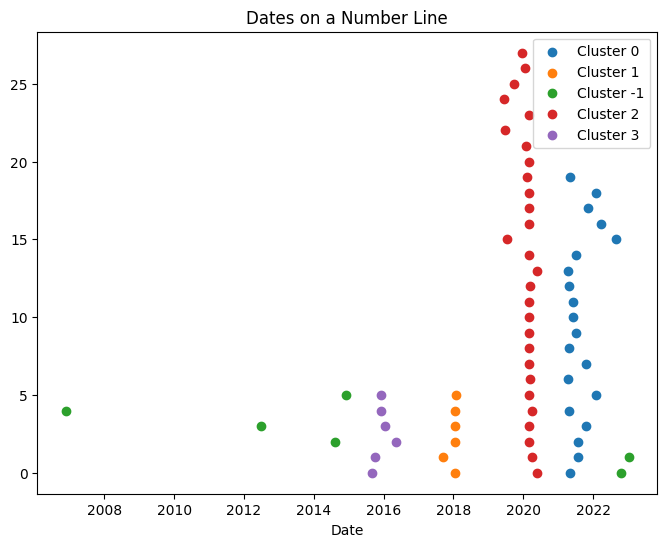

In [1044]:
dates = [x for x in df['date'].values.tolist() if x!= None]
density_threshold = 1  # Adjust this value based on your data and requirements

temporal_df = plot_dates(dates)


In [1006]:
merged_df

,title,snippet,date,sourceids,full_text,topic,name,representation,representative_docs,top_n_words,probability,representative_document
0,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.825963,False
1,Zurich Insurance PLC v Niramax Group Limited [...,"4 May 2021 - The Respondent, Niramax, was in t...","{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[4eb3a73b-1feb-4c84-a5fc-0a15d9df8410, e4c060e...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.825963,False
2,Non-disclosure to insurers (pre-Insurance Act ...,"29 Jul 2021 - In December 2015, waste collecti...","{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...","[1afc8049-8272-425f-aea1-23d0dda39eb3, c43a9f9...",Non-disclosure to insurers (pre-Insurance Act ...,-1,-1_niramax_products_rubber_elliott,"[niramax, products, rubber, elliott, neil, bos...","[Killer Neil Elliott's role at Niramax, the wa...",niramax - products - rubber - elliott - neil -...,0.000000,False
3,Recycling firm Niramax fined Â£16000 over envi...,15 Jan 2018 - Niramax Group Ltd pleaded guilty...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[be8451e5-537a-4088-8763-2dfbd7a77ad5, 5e7bf3c...",Recycling firm Niramax fined Â£16000 over envi...,-1,-1_niramax_products_rubber_elliott,"[niramax, products, rubber, elliott, neil, bos...","[Killer Neil Elliott's role at Niramax, the wa...",niramax - products - rubber - elliott - neil -...,0.000000,False
4,Contact us - Niramax Group Limited,Niramax Group Limited John Shadforth House Tho...,None,"[11c72183-4331-44e5-ad37-5d93ee6c67ea, 9d1c254...",Contact us - Niramax Group LimitedNiramax Grou...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
90,NIRAMAX HOLDINGS LIMITED more information - Fi...,NIRAMAX HOLDINGS LIMITED - Free company inform...,None,[7e3564a2-260d-495a-ad56-d02d20e37e2a],NIRAMAX HOLDINGS LIMITED more information - Fi...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
91,NIRAMAX GROUP LIMITED filing history - Find an...,NIRAMAX GROUP LIMITED - Free company informati...,None,[6faef2d8-caba-4679-850e-8dcccec6be2e],NIRAMAX GROUP LIMITED filing history - Find an...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,True
92,NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,... NIRAMAX RUBBER PRODUCTS LIMITED - Free co...,"{'Year': 2019, 'Month': 12, 'MonthShort': 'Dec...",[0d3e07fe-a5fc-4547-aab1-556624ee7203],NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,-1,-1_niramax_products_rubber_elliott,"[niramax, products, rubber, elliott, neil, bos...","[Killer Neil Elliott's role at Niramax, the wa...",niramax - products - rubber - elliott - neil -...,0.000000,True
93,NIRAMAX RUBBER PRODUCTS LIMITED more informati...,NIRAMAX RUBBER PRODUCTS LIMITED - Free company...,None,[098006b4-6e71-4182-adcb-eba1d2467804],NIRAMAX RUBBER PRODUCTS LIMITED more informati...,-1,-1_niramax_products_rubber_elliott,"[niramax, products, rubber, elliott, neil, bos...","[Killer Neil Elliott's role at Niramax, the

In [1007]:
def merge_datetime_dfs(df1 : pd.DataFrame, df2 : pd.DataFrame): 
    df1['date_str'] = df1['date'].apply(lambda x: str(x))
    df2['date_str'] = df2['date'].apply(lambda x: str(x))

    # Perform the merge based on the 'date_str' column
    merged_df = pd.merge(df1, df2, on='date_str')
    merged_df = merged_df.drop_duplicates(subset= "full_text")

    
    return merged_df

In [1008]:
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


In [1013]:
new_df

,date_x,label_temporal,date_str,title,snippet,date_y,sourceids,full_text,topic,name,representation,representative_docs,top_n_words,probability,representative_document
0,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...",0,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...",Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.854689,False
1,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...",0,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...",Non-disclosure to insurers (pre-Insurance Act ...,"29 Jul 2021 - In December 2015, waste collecti...","{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...","[1afc8049-8272-425f-aea1-23d0dda39eb3, c43a9f9...",Non-disclosure to insurers (pre-Insurance Act ...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.833170,False
2,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Recycling firm Niramax fined Â£16000 over envi...,15 Jan 2018 - Niramax Group Ltd pleaded guilty...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[be8451e5-537a-4088-8763-2dfbd7a77ad5, 5e7bf3c...",Recycling firm Niramax fined Â£16000 over envi...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.841342,False
3,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Waste firm Niramax fined £16000 for storing to...,15 Jan 2018 - Waste firm Niramax has been slap...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[818e914d-d8b4-4b2d-b030-b5bc2d0fe3ef, 9e70e8e...",Waste firm Niramax fined £16000 for storing to...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.920611,True
4,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Waste management firm fined for fly infestatio...,"15 Jan 2018 - Lee Fish, prosecuting, said the ...","{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[028d5410-13c7-4639-8166-2129455c90ce, 9bfd391...",Waste management firm fined for fly infestatio...,2,2_waste_tax_firm_fraud,"[waste, tax, firm, fraud, fined, landfill, int...",[Waste firm Niramax fined £16000 for storing t...,waste - tax - firm - fraud - fined - landfill ...,0.757582,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,"{'Year': 2019, 'Month': 6, 'MonthShort': 'Jun'...",2,"{'Year': 2019, 'Month': 6, 'MonthShort': 'Jun'...",Niramax boss Neil Elliott in court charged wit...,14 Jun 2019 - A director of Niramax waste mana...,"{'Year': 2019, 'Month': 6, 'MonthShort': 'Jun'...","[1ac09ad4-01f0-494a-bcf4-8b905f4c20af, cded262...",Niramax boss Neil Elliott in court charged wit...,1,1_elliott_neil_murder_hartlepool,"[elliott, neil, murder, hartlepool, of, in, ja...",[Businessman jailed over death of drug addict ...,elliott - neil - murder - hartlepool - of - in...,0.916631,False
192,"{'Year': 2019, 'Month': 9, 'MonthShort': 'Sep'...",2,"{'Year': 2019, 'Month': 9, 'MonthShort': 'Sep'...",Seven Hartlepool men appear in court charged w...,"27 Sept 2019 - At the court hearing on Friday,...","{'Year': 2019, 'Month': 9, 'MonthShort': 'Sep'...","[05b514a4-cecc-4099-96fa-97c556b0f592, fc094c1...",Seven Hartlepool men appear in court charged w...,1,1_elliott_neil_murder_hartlepool,"[elliott, neil, murde

In [1009]:
new_df[new_df['topic'] == 1]['full_text'].unique()

array(['Underwriting on trial30 Jul 2021 - In the first case, Zurich Insurance plc v Niramax Group Ltd ... Niramax, the insured, was in the business of waste collection and recycling.',
       'Businessman jailed over death of drug addict he thought had ...Elliott, the 44-year-old owner of the Niramax recycling firm and who lived ... Shop fitter jailed for multi-million-pound tax evasion over five-year period ...',
       'Businessman jailed over death of drug addict he thought had ...Elliott, the 44-year-old owner of the Niramax recycling firm and who lived in a Hartlepool seven-bedroom mansion with swimming pool and stables, ...',
       'Businessman jailed over death of drug addict he thought had ...Elliott, the 44-year-old owner of the Niramax recycling firm and who lived in a ... Teacher shot by six-year-old pupil files multimillion-dollar lawsuit ...',
       'Businessman jailed over death of drug addict he thought had ...... to be investigated by the police and treated as innoce

In [1045]:
for i in range(3):
    unique_docs = new_df[new_df['topic'] == i]['snippet'].tolist()
    title_docs = new_df[new_df['topic'] == i]['representative_docs'].tolist()[0]
    print(title_docs, "\n\n\n")

['NIRAMAX GROUP LIMITED filing history - Find and update ...', 'NIRAMAX HOLDINGS LIMITED charges - Find and update company ...', 'NIRAMAX GROUP LIMITED charges - Find and update company ...'] 



['Businessman jailed over death of drug addict he thought ...', "Murder accused Niramax boss Neil Elliott 'lives in one of ...", 'Michael Phillips murder trial: Neil Elliott - The Hartlepool ...'] 



['Waste firm Niramax fined £16000 for storing too many tyres ...', 'Waste management firm fined for fly infestation and ...', 'Tax fraud probe into waste firm formerly run by killer Neil ...'] 





In [1040]:
title_docs

['Businessman jailed over death of drug addict he thought ...',
 "Murder accused Niramax boss Neil Elliott 'lives in one of ...",
 'Michael Phillips murder trial: Neil Elliott - The Hartlepool ...']

In [1047]:
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_duplicates(titles: List[str], title_docs : List[str]):
    print(title_docs, "\n")
    embeddings = model.encode(titles)
    title_embedding = model.encode(title_docs, )
    similarity_matrix = cosine_similarity(embeddings, np.average(title_embedding,axis = 0).reshape(1,-1))
    for i, title in enumerate(titles): 
        print(similarity_matrix[i], title)

find_duplicates(new_df[new_df['topic'] == 2]['full_text'].tolist(), title_docs)

['Waste firm Niramax fined £16000 for storing too many tyres ...', 'Waste management firm fined for fly infestation and ...', 'Tax fraud probe into waste firm formerly run by killer Neil ...'] 

[0.6424646] Recycling firm Niramax fined Â£16000 over environmental ...15 Jan 2018 - Niramax Group Ltd pleaded guilty to offences relating to the storing of a huge pile of shredded tyres at its Tofts Road site in Hartlepool ...
[0.7632488] Waste firm Niramax fined £16000 for storing too many tyres ...15 Jan 2018 - Waste firm Niramax has been slapped with a £16,000 fine after admitting it ... arguments that it was negligent, and fined the firm £13,600.
[0.59372735] Waste management firm fined for fly infestation and ...15 Jan 2018 - Lee Fish, prosecuting, said the offences had been committed out of negligence. Niramax waste site in Washington (Image: Newcastle Chronicle).
[0.6948409] Government 'Close to Decriminalising Waste Crime and Fly ...19 Oct 2022 - HMRC spent six years investigating susp

In [1010]:
from typing import List

In [1011]:
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_duplicates(titles: List[str]):
    embeddings = model.encode(titles)

    similarity_matrix = cosine_similarity(embeddings)
    np.fill_diagonal(similarity_matrix, 0)  # Set diagonal elements to 0

    lower_triangle = np.tril(similarity_matrix)  # Get lower triangle of the similarity matrix
    print(lower_triangle.shape)
    duplicate_indices = np.where(lower_triangle > 0.6)
    
    print(duplicate_indices)

find_duplicates(new_df[new_df['topic'] == 1]['full_text'].tolist())



(24, 24)
(array([ 2,  3,  3,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21]), array([ 1,  1,  2,  1,  2,  3,  1,  2,  4,  0,  1,  2,  3,  4,  5,  1,  2,
        3,  4,  5,  6,  5,  1,  2,  4,  5,  6,  7,  8,  2,  4,  5,  6,  7,
        8,  9,  4,  5,  6,  8, 10,  5,  9, 10,  2,  4,  5,  6,  7,  8,  9,
       10, 11, 13,  2,  8, 14,  2,  4,  5,  6,  7,  9, 10, 13, 14, 12,  4,
        5,  6,  7,  8, 10, 11, 14, 17,  2,  4,  5,  6,  7,  8,  9, 10, 11,
       13, 14, 17, 18, 20]))


In [1012]:
find_duplicates(embeddings)

TypeError: object of type 'numpy.float32' has no len()

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named df with columns 'Date' and 'label_temporal'
n = 10  # Minimum number of occurrences for a value to be retained

# Count the occurrences of each value in 'label_temporal' column
value_counts = df['label_temporal'].value_counts()

# Get the values that appear at least 'n' times
valid_values = value_counts[value_counts >= n].index

# Filter the DataFrame based on the valid values
filtered_df = df[df['label_temporal'].isin(valid_values)]

# Print the filtered DataFrame
print(filtered_df)


KeyError: 'label_temporal'

In [ ]:
temporal_df['DateStr'] = temporal_df['Date'].apply(lambda x: str(x)) 
merged_df['DateStr'] = merged_df['Date'].apply(lambda x: str(x))



In [ ]:
merged_df

,Title,Snippet,Date,SourceIds,full_text,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document,DateStr
0,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.947521,False,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'..."
1,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.947521,False,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'..."
2,Zurich Insurance PLC v Niramax Group Limited [...,"4 May 2021 - The Respondent, Niramax, was in t...","{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[4eb3a73b-1feb-4c84-a5fc-0a15d9df8410, e4c060e...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.947521,False,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'..."
3,Zurich Insurance PLC v Niramax Group Limited [...,"4 May 2021 - The Respondent, Niramax, was in t...","{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[4eb3a73b-1feb-4c84-a5fc-0a15d9df8410, e4c060e...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.947521,False,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'..."
4,Non-disclosure to insurers (pre-Insurance Act ...,"29 Jul 2021 - In December 2015, waste collecti...","{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...","[1afc8049-8272-425f-aea1-23d0dda39eb3, c43a9f9...",Non-disclosure to insurers (pre-Insurance Act ...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.880121,False,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NIRAMAX HOLDINGS LIMITED more information - Fi...,NIRAMAX HOLDINGS LIMITED - Free company inform...,None,[7e3564a2-260d-495a-ad56-d02d20e37e2a],NIRAMAX HOLDINGS LIMITED more information - Fi...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,1.000000,False,None
178,NIRAMAX GROUP LIMITED filing history - Find an...,NIRAMAX GROUP LIMITED - Free company informati...,None,[6faef2d8-caba-4679-850e-8dcccec6be2e],NIRAMAX GROUP LIMITED filing history - Find an...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.960022,True,None
179,NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,... NIRAMAX RUBBER PRODUCTS LIMITED - Free co...,"{'Year': 2019, 'Month': 12, 'MonthShort': 'Dec...",[0d3e07fe-a5fc-4547-aab1-556624ee7203],NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.747977,False,"{'Year': 2019, 'Month': 12, 'MonthShor

In [ ]:
temporal_df

,Date,label_temporal,DateStr
0,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...",0,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'..."
1,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...",0,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'..."
2,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...",0,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'..."
3,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...",0,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'..."
4,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'..."
...,...,...,...
135,"{'Year': 2020, 'Month': 1, 'MonthShort': 'Jan'...",2,"{'Year': 2020, 'Month': 1, 'MonthShort': 'Jan'..."
136,"{'Year': 2020, 'Month': 1, 'MonthShort': 'Jan'...",2,"{'Year': 2020, 'Month': 1, 'MonthShort': 'Jan'..."
137,"{'Year': 2015, 'Month': 12, 'MonthShort': 'Dec...",3,"{'Year': 2015, 'Month': 12, 'MonthShort': 'Dec..."
138,"{'Year': 2015, 'Month': 12, 'MonthShort': 'Dec...",3,"{'Year': 2015, 'Month': 12, 'MonthShort': 'Dec..."


In [ ]:
x = pd.merge(temporal_df, merged_df, on='DateStr')


In [ ]:
x['full_text'] = x['Title'] + x['Snippet']


# Drop duplicates based on a specific column

x.drop_duplicates(subset='full_text')

,Date_x,label_temporal,DateStr,Title,Snippet,Date_y,SourceIds,full_text,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...",0,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...",Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.947521,False
4,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...",0,"{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...",Non-disclosure to insurers (pre-Insurance Act ...,"29 Jul 2021 - In December 2015, waste collecti...","{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...","[1afc8049-8272-425f-aea1-23d0dda39eb3, c43a9f9...",Non-disclosure to insurers (pre-Insurance Act ...,0,0_limited_niramax_find_and,"[limited, niramax, find, and, group, update, p...",[NIRAMAX GROUP LIMITED filing history - Find a...,limited - niramax - find - and - group - updat...,0.880121,False
8,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Recycling firm Niramax fined Â£16000 over envi...,15 Jan 2018 - Niramax Group Ltd pleaded guilty...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[be8451e5-537a-4088-8763-2dfbd7a77ad5, 5e7bf3c...",Recycling firm Niramax fined Â£16000 over envi...,1,1_waste_firm_tax_fraud,"[waste, firm, tax, fraud, fined, recycling, la...",[Waste firm Niramax fined £16000 for storing t...,waste - firm - tax - fraud - fined - recycling...,0.790841,False
10,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Waste firm Niramax fined £16000 for storing to...,15 Jan 2018 - Waste firm Niramax has been slap...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[818e914d-d8b4-4b2d-b030-b5bc2d0fe3ef, 9e70e8e...",Waste firm Niramax fined £16000 for storing to...,1,1_waste_firm_tax_fraud,"[waste, firm, tax, fraud, fined, recycling, la...",[Waste firm Niramax fined £16000 for storing t...,waste - firm - tax - fraud - fined - recycling...,0.842269,True
12,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",1,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...",Waste management firm fined for fly infestatio...,"15 Jan 2018 - Lee Fish, prosecuting, said the ...","{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[028d5410-13c7-4639-8166-2129455c90ce, 9bfd391...",Waste management firm fined for fly infestatio...,1,1_waste_firm_tax_fraud,"[waste, firm, tax, fraud, fined, recycling, la...",[Waste firm Niramax fined £16000 for storing t...,waste - firm - tax - fraud - fined - recycling...,0.787630,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,"{'Year': 2019, 'Month': 6, 'MonthShort': 'Jun'...",2,"{'Year': 2019, 'Month': 6, 'MonthShort': 'Jun'...",Niramax boss Neil Elliott in court charged wit...,14 Jun 2019 - A director of Niramax waste mana...,"{'Year': 2019, 'Month': 6, 'MonthShort': 'Jun'...","[1ac09ad4-01f0-494a-bcf4-8b905f4c20af, cded262...",Niramax boss Neil Elliott in court charged wit...,2,2_elliott_neil_murder_hartlepool,"[elliott, neil, murder, hartlepool, boss, of, ...",[Niramax boss Neil Elliott in court charged wi...,elliott - neil - murder - hartlepool - boss - ...,0.850673,True
1301,"{'Year': 2019, 'Month': 9, 'MonthShort': 'Sep'...",2,"{'Year': 2019, 'Month': 9, 'MonthShort': 'Sep'...",Seven Hartlepool men appear in court charged w...,"27 Sept 2019 - At the court hearing on Friday,...","{'Year': 2019, 'Month': 9, 'MonthShort': 'Sep'...","[05b514a4-cecc-4099-96fa-97c556b0f592, fc094c1...",Seven Hartlepool men appear in court charged w...,2,2_elliott_neil_murder_hartlepool,"[elliott, neil, mur

In [ ]:
topic_model = BERTopic(verbose=True).fit(x.full_text, y=x.label_temporal)


Batches:   0%|          | 0/42 [00:00<?, ?it/s]

2023-06-17 16:58:42,328 - BERTopic - Transformed documents to Embeddings
2023-06-17 16:58:47,889 - BERTopic - Reduced dimensionality
2023-06-17 16:58:47,918 - BERTopic - Clustered reduced embeddings


In [ ]:
for i in rangetopic_model.get_representative_docs()

{-1: ['Niramax pleads guilty to permit breach19 Jan 2018 - Hartlepool-based Niramax Group has been fined for breaching environmental laws leading to a fly infestation which affected the local community.',
  'Exhibition captures images of iconic musicians from Top ...30 Aug 2015 - The Hartlepool Art Gallery exhibition programme is sponsored by local company Niramax Total Waste Solutions.',
  'Exhibition captures images of iconic musicians from Top ...30 Aug 2015 - The Hartlepool Art Gallery exhibition programme is sponsored by local company Niramax Total Waste Solutions.'],
 0: ['Businessman jailed over death of drug addict he thought had ...Elliott, the 44-year-old owner of the Niramax recycling firm and who lived in a Hartlepool seven-bedroom mansion with swimming pool and stables, ...',
  'Businessman jailed over death of drug addict he thought had ...Elliott, the 44-year-old owner of the Niramax recycling firm and who lived in a Hartlepool seven-bedroom mansion with swimming pool an

In [ ]:
label_df = pd.read_csv("peudolabels.csv")

In [ ]:
label_df[np.logical_or(label_df['label'] == "0",label_df['label'] =="1")]

,Unnamed: 0,Title,Snippet,Date,SourceIds,label,Year,Month,Day
0,0,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,2021-05-05,"['d59499b9-4d75-4aec-9e85-fecccb89b476', '97d7...",0,2021.0,5.0,5.0
1,1,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,2021-05-05,"['d59499b9-4d75-4aec-9e85-fecccb89b476', '97d7...",0,2021.0,5.0,5.0
2,2,Non-disclosure to insurers (pre-Insurance Act ...,"29 Jul 2021 - In December 2015, waste collecti...",2021-07-29,"['1afc8049-8272-425f-aea1-23d0dda39eb3', 'c43a...",0,2021.0,7.0,29.0
3,3,Non-disclosure to insurers (pre-Insurance Act ...,"29 Jul 2021 - In December 2015, waste collecti...",2021-07-29,"['1afc8049-8272-425f-aea1-23d0dda39eb3', 'c43a...",1,2021.0,7.0,29.0
4,4,Recycling firm Niramax fined Â£16000 over envi...,15 Jan 2018 - Niramax Group Ltd pleaded guilty...,2018-01-15,"['be8451e5-537a-4088-8763-2dfbd7a77ad5', '5e7b...",1,2018.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...
163,163,Niramax boss Neil Elliott in court charged wit...,14 Jun 2019 - A director of Niramax waste mana...,2019-06-14,"['1ac09ad4-01f0-494a-bcf4-8b905f4c20af', 'cded...",1,2019.0,6.0,14.0
164,164,Niramax boss Neil Elliott in court charged wit...,14 Jun 2019 - A director of Niramax waste mana...,2019-06-14,"['1ac09ad4-01f0-494a-bcf4-8b905f4c20af', 'cded...",1,2019.0,6.0,14.0
167,167,NIRAMAX GROUP LIMITED charges - Find and updat...,NIRAMAX GROUP LIMITED - Free company informati...,NaN,['d614275d-10e0-444a-ab18-1d4f747fbd22'],0,NaN,NaN,NaN
168,168,Seven Hartlepool men appear in court charged w...,"27 Sept 2019 - At the court hearing on Friday,...",2019-09-27,"['05b514a4-cecc-4099-96fa-97c556b0f592', 'fc09...",1,2019.0,9.0,27.0


In [ ]:
merged_df = pd.merge(merged_df, temporal_df, left_on=['Date'], right_on=['date'], )
# Drop the redundant 'Document' column from the merged DataFrame
merged_df

KeyError: 'date'

In [ ]:
murder_data = merged_df[merged_df.Topic == 2]['Title'].unique(
).tolist()

In [ ]:
murder_data

["Government 'Close to Decriminalising Waste Crime and Fly ...",
 'english law - The Institute of International Shipping & Trade Law ...',
 'Failed landfill tax-fraud probe cost more than £3m',
 'Waste Industry: Criminality and Regulation - Hansard',
 'Professions and Financial Lines Brief: latest decisions July ...',
 'Landfill Tax Fraud',
 'Waste management firm fined for fly infestation and ...',
 'Investigation into £78m landfill tax fraud collapses with no ...',
 'Tax fraud probe into waste firm formerly run by killer Neil ...',
 'Human chain protest along North East coast: reclaim our sea',
 'Waste Industry: Criminality and Regulation - Parliamentary record',
 'Boss of a multimillion-pound recycling business convicted ...',
 'Company fined £10000 for illegally shredding tyres',
 'Recycling firm faces thousands in environmental fines',
 'Organised criminals in waste management taking ...']

In [ ]:
topics

[0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 2,
 1,
 0,
 2,
 -1,
 2,
 1,
 0,
 2,
 -1,
 0,
 0,
 0,
 2,
 -1,
 1,
 0,
 1,
 0,
 -1,
 -1,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 -1,
 1,
 2,
 1,
 1,
 1,
 -1,
 -1,
 2,
 1,
 0,
 1,
 1,
 -1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 -1,
 1,
 2,
 2,
 -1,
 0,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 -1,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [1091]:
import spacy

# Load the pre-trained English NER model from spaCy
nlp = spacy.load("en_core_web_sm")

# Example news data
news_data = new_df.full_text.tolist()

triplets = []

# Process the sentence with spaCy
for sentence in news_data:
    doc = nlp(sentence)

    # Extract dependency triplets involving specified entity types
    for token in doc:
        if token.dep_ == "nsubj" or token.dep_ == "dobj":
            if token.ent_type_ in ["PERSON", "NORP", "FAC", "ORG", "EVENT", "LAW"]:
                subject = token.head.text
                relation = token.dep_
                object_ = token.text
                triplets.append((subject, relation, object_))

# Print the extracted dependency triplets
for triplet in triplets:
    subject, relation, object_ = triplet
    print(f"{subject} --{relation}--> {object_}")


suffered --nsubj--> Limited
pleaded --nsubj--> Ltd
dropped --dobj--> Defence
concluded --nsubj--> Agency
terminated --nsubj--> Elliott
jailed --nsubj--> Businessman
jailed --dobj--> Elliott
jailed --nsubj--> Businessman
jailed --dobj--> Elliott
jailed --nsubj--> Businessman
jailed --dobj--> Elliott
jailed --nsubj--> Businessman
jailed --nsubj--> Elliott
jailed --nsubj--> Businessman
jailed --nsubj--> Businessman
organised --nsubj--> Elliott
seeks --nsubj--> Yorkshire
is --nsubj--> Elliott
died --nsubj--> Phillips
Wearing --dobj--> Elliott
said --nsubj--> Antropik
left --nsubj--> supporters9
highlighted --nsubj--> Jones
Niramax --dobj--> Elliott


In [1092]:
import networkx as nx

# Create an empty directed graph
graph = nx.DiGraph()

# Example dependency triplets

# Add nodes and edges to the graph
for subject, relation, object_ in triplets:
    graph.add_edge(subject, object_, label=relation)

# Print the nodes and edges of the graph
print("Nodes:", graph.nodes())
print("Edges:")
for source, target, data in graph.edges(data=True):
    print(f"{source} --{data['label']}--> {target}")


Nodes: ['suffered', 'Limited', 'pleaded', 'Ltd', 'dropped', 'Defence', 'concluded', 'Agency', 'terminated', 'Elliott', 'jailed', 'Businessman', 'organised', 'seeks', 'Yorkshire', 'is', 'died', 'Phillips', 'Wearing', 'said', 'Antropik', 'left', 'supporters9', 'highlighted', 'Jones', 'Niramax']
Edges:
suffered --nsubj--> Limited
pleaded --nsubj--> Ltd
dropped --dobj--> Defence
concluded --nsubj--> Agency
terminated --nsubj--> Elliott
jailed --nsubj--> Businessman
jailed --nsubj--> Elliott
organised --nsubj--> Elliott
seeks --nsubj--> Yorkshire
is --nsubj--> Elliott
died --nsubj--> Phillips
Wearing --dobj--> Elliott
said --nsubj--> Antropik
left --nsubj--> supporters9
highlighted --nsubj--> Jones
Niramax --dobj--> Elliott


In [1081]:
reachable_nodes

{'information'}

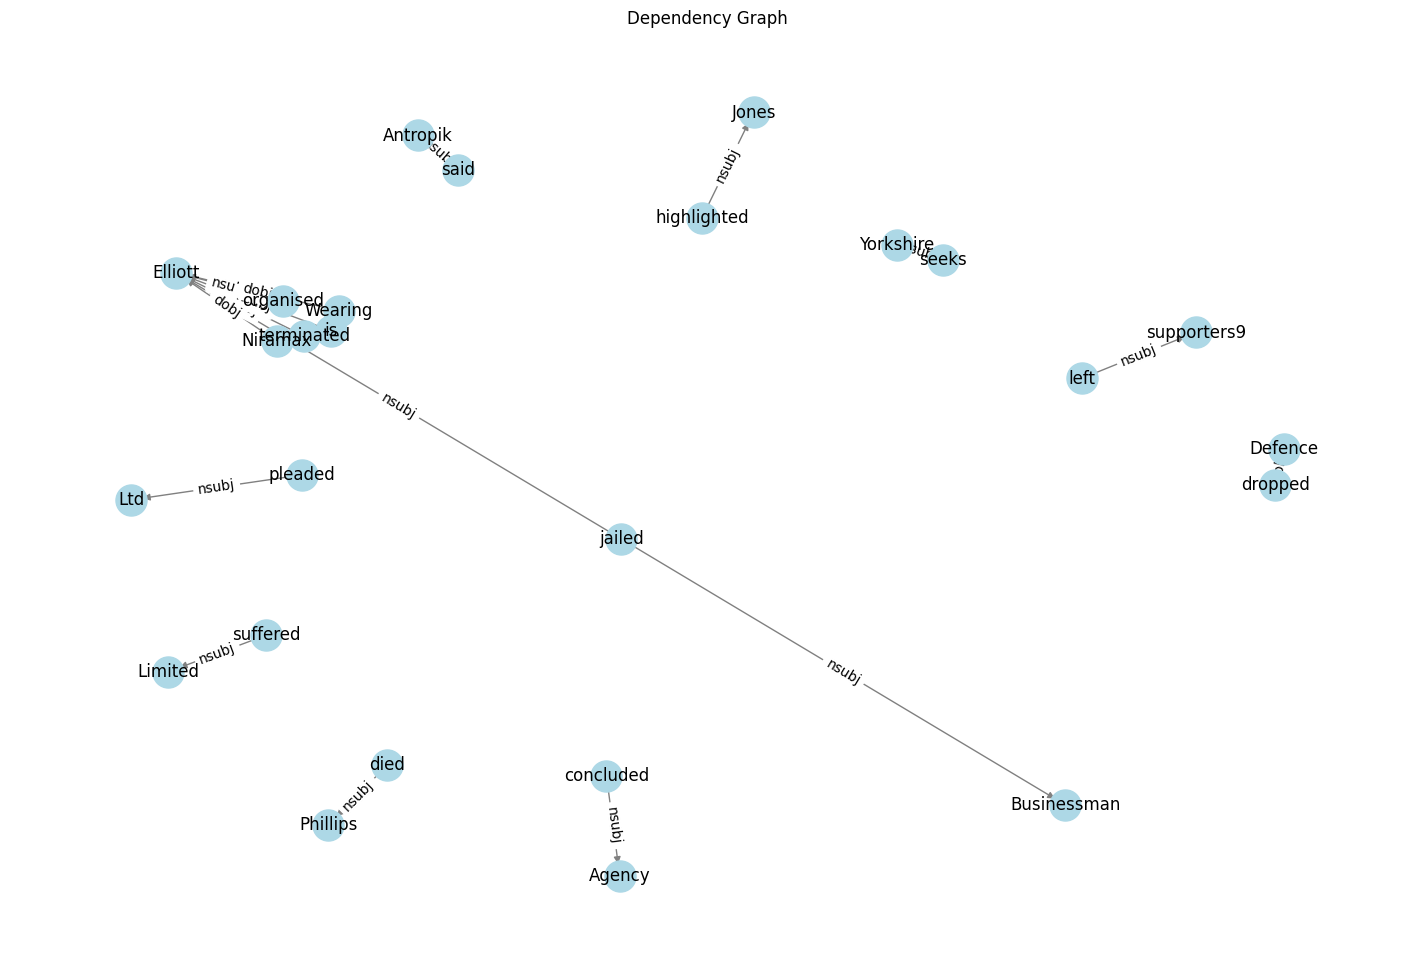

In [1094]:
plt.figure(figsize=(18,12))
# Create a layout for the graph


pos = nx.spring_layout(graph)

# Draw the nodes
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color="lightblue")

# Draw the edges
nx.draw_networkx_edges(graph, pos, arrows=True, edge_color="gray")

# Draw the labels
nx.draw_networkx_labels(graph, pos, font_size=12, font_color="black")

# Draw the edge labels
edge_labels = nx.get_edge_attributes(graph, "label")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Set plot properties
plt.title("Dependency Graph")
plt.axis("off")

# Display the plot
plt.show()